In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('InterpolacionNewtonNoequi.csv', sep=',')
X = df['X'].values
Y = df['Y'].values

In [3]:
def Newton_Gregory_Generator(X, Y):
    Diff = np.zeros((len(X), len(Y)))
    Diff[:, 0] = Y
    n = len(X)
    for i in range(1, n):
        for j in range(i, len(Y)):
            Diff[j,
                 i] = (Diff[j, i - 1] - Diff[j - 1, i - 1]) / (X[j] - X[j - i])
    return Diff


In [4]:
def Newton_gregory(X, Y, x):
    n = len(X)
    Diff = Newton_Gregory_Generator(X, Y)
    y = Y[0]
    h = X[1] - X[0]

    poly = 1.0

    for i in range(1, n):
        poly *= (x - X[i - 1])
        for j in range(i, len(Y)):
            h = X[j] - X[j - i]
            Diff[j, i] = (Diff[j, i - 1] - Diff[j - 1, i - 1]) / h
        y += (poly * Diff[i, i])
    return y, np.round(Diff, 2)


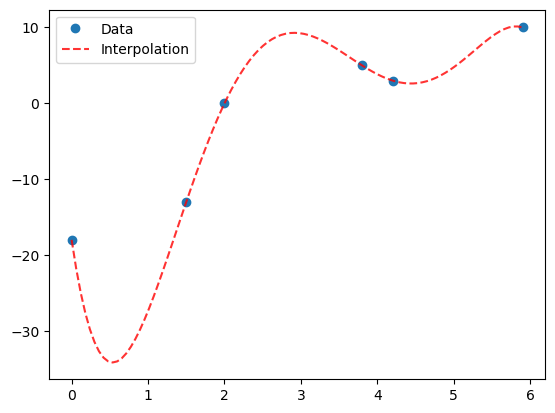

In [5]:
x_c = np.linspace(np.min(X), np.max(X), 100)
y_c, _ = Newton_gregory(X, Y, x_c)

plt.plot(X, Y, "o", label="Data")
plt.plot(x_c, y_c, color="red", label="Interpolation", alpha=0.8, linestyle="--")
plt.legend()
plt.show()